In [16]:
import csv
from bs4 import BeautifulSoup
import re
import os
import pandas as pd
from lxml import etree
try:
    from urllib2 import urlopen
except ImportError:
    from urllib.request import urlopen
import dateutil
from dateutil.parser import *
from datetime import datetime
import matplotlib


In [4]:
csv_main = csv.DictReader(open("/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/ALL_CRAWLS/Germany/agile_sites_output.csv"), fieldnames=["id", 'url', 'domain', 'date1', 'date2', 'date3', 'heading'])

In [5]:
array = {}

In [6]:
for line in csv_main: 
    array[line["id"]] = line

In [27]:
# assigning the regex search terms
agile_regex = re.compile(r'\bagile\b|\bagility\b', re.IGNORECASE | re.UNICODE)
agile_method_regex = re.compile(r'\bagile\b((?![.]|agile).)*?\bmethod\w*?\b', re.IGNORECASE | re.UNICODE)

agile_context_regex = re.compile(r'\s*([^\s]+?)\s+([^\s]+?)\s+([^\s]+?)\s+([^\s]+?)\s+agil.*?\s+([^\s]+)\s+([^\s]+?)\s+([^\s]+?)\s+([^\s]+?)\s+', re.IGNORECASE | re.UNICODE)

# setting the directory to store the text files
text_dir = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/TextFiles/UK"


# finding regex expressions, dates etc. for every observation in the dataset
for id, line in array.items():
    print("processing {}".format(id))
    id = line["id"]
    domain = line["domain"]
    path = '/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/ALL_CRAWLS/Germany/Federal/{}/{}.html'.format(domain, id)
    try:  
        soup = BeautifulSoup(open(path), "html.parser")
    except UnicodeDecodeError:
        soup = BeautifulSoup(open(path, encoding='windows-1252'), "html.parser")    
    doctext = soup.get_text().replace("\n", " ")
    with open("{}/{}.txt".format(text_dir, id), "w") as textfile:
        textfile.write(doctext)
    
    date4_element = soup.select_one("span.date")
    date4 = ""
    if date4_element is not None:
        date4 = date4_element.get_text()
    
    #Getting date5

    htmlparser = etree.HTMLParser()    
    try:
        tree = etree.parse(open(path), htmlparser)
    except UnicodeDecodeError:
        tree = etree.parse(open(path, encoding='windows-1252'), htmlparser)
    date5 = tree.xpath("substring(substring-after(/html//script[@type='application/ld+json']/text(), 'datePublished'), 4, 23)")

    # a special cases for date 5
    date5_1 = tree.xpath("substring(substring-after(/html//script[@type='application/ld+json']/text(), 'datePublished'), 4, 25)")


    # Getting date6

    date6_element = soup.select_one("h1#page-title + p")
    date6 = ""
    if date6_element is not None:
        date6 = date6_element.get_text()


    # Getting date7 from National Archives --> the date the site was archived on --> the date the site was released on would have been even earlier

    date7 = tree.xpath("substring(substring-after(/html/head/script/text(), 'timestamp'),9,14)")


    # assinging the already crawled dates
    date1 = line["date1"]
    date2 = line["date2"]


    # Storing the oldest date as final date variable in python date format
    date_vars = [date1, date2, date4, date5, date5_1, date6, date7]
    
    final_date = None 

    for date_var in date_vars:
        try:
            if final_date is None:
                final_date = parse(date_var, ignoretz = True)
            elif parse(date_var, ignoretz=True) < final_date:
                final_date = parse(date_var, ignoretz=True)
        except dateutil.parser._parser.ParserError:
            pass 


    #finding the matches for agile and agility
    agile_term = []
    agile_term = agile_regex.findall(doctext)

    #finding the matches for agile...methods
    agile_method = []
    agile_method = agile_method_regex.findall(doctext)

    # finding the context for the agile
    agile_context = []
    agile_context = agile_context_regex.search(doctext)

    agile_context_pre = ""
    agile_context_post = ""
    
    if agile_context is not None:
        agile_context_pre = " ".join(agile_context.group(1,2,3,4))
        agile_context_post = " ".join(agile_context.group(5,6,7,8))
    

    # assigning all the variables to the items

    if len(agile_term) == 0:
        line["agile_term"] = "" 
    else:
        line["agile_term"] = ",".join(agile_term)
    
    if len(agile_method) == 0:
        line["agile_method"] = "" 
    else:
        line["agile_method"] = ",".join(agile_method)

    line["agile_context_pre"] = agile_context_pre
    line["agile_context_post"] = agile_context_post 
    line["date4"] = date4
    line["date5"] = date5
    line["date5_1"] = date5_1
    line["date6"] = date6
    line["date7"] = date7
    line["final_date"] = final_date
    line["country"] = "Britain"
    line["level"] = "general"
    line["text_file_loc"] = "{}/{}.txt".format(text_dir, id)

273-11f5-389a-9fdc-bb25698ad02d
processing 129f6cc5-c486-3e87-ba17-f7a9e459cbe7
processing 6623951c-ab58-3e64-946a-711208cb09ab
processing 311bd1b2-fbb8-361c-a0bd-10df02957190
processing 994bb0f2-1762-346a-8458-b2086eaeb744
processing c8e6259e-d532-3be8-b915-64a31a58219d
processing 301dcd04-e8a8-3478-951d-dd1fbcfdbd32
processing 3bd98b3e-6e08-38fd-84a2-312b4e70a36d
processing dae049dc-8dcf-37ca-9746-c5695c348994
processing 10296bf6-9750-30b7-87f9-d616afaff68d
processing 00fbf2a7-1af1-3636-88c6-7d9df0085a8e
processing c1c89022-02b3-3093-8eeb-c1c2408bbbd7
processing d33657af-96f3-3db2-9247-d38a8dc31f2a
processing f953464b-6d01-3672-a78a-6bae348abb79
processing 474df3c9-7253-3377-93d4-d9bdc4972bec
processing fd3373c3-4fd7-32b0-bd98-d8263b7c70f2
processing 6434a58a-6778-33db-9992-7784b5cb9fc4
processing 06321551-224b-30b3-8384-c93cbc7bb417
processing 3546db0c-a883-3a7b-bae3-1beedb3b93e7
processing 15c44474-626e-31e9-ade6-691a38508173
processing 627cc0eb-abbf-3377-aacd-e417f79e3d08
processi

In [23]:
outputfile = open("/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/CSVs/UK/UK.csv", "w")
writer = csv.DictWriter(outputfile, fieldnames=["id", "country", "level", 'url', 'domain', 'date1', 'date2', 'date3', 'date4', 'date5', 'date5_1', 'date6', 'date7', 'final_date', 'heading', 'agile_term', 'agile_method', 'agile_context_pre', 'agile_context_post', 'text_file_loc'])
writer.writeheader()
for id, line in array.items():
    writer.writerow(line)
outputfile.close()

In [24]:
#deleting double rows (if any) and rows where agile_term is empty hence not "agile" or "agility"

inputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/CSVs/UK//UK.csv"
outputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/CSVs/UK/UK_v1.csv"


with open(inputFileName, newline='') as inFile, open(outputFileName, 'w', newline='') as outFile:
    df = pd.read_csv(inFile)
    df.sort_values(by=['final_date'])
    df.dropna(axis=0, how='any', thresh=None, subset=(['agile_term', 'agile_context_pre', 'agile_context_post']), inplace=True)
    df.drop_duplicates(subset=(['heading', 'agile_context_pre', 'agile_context_post']), inplace=True)
    df['heading'] = df['heading'].astype(str)
    df.to_csv(outFile)

In [26]:
#deleting false positives from the list

inputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/CSVs/UK/UK_v1.csv"
outputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/CSVs/UK/UK_v2.csv"



with open(inputFileName, newline='') as inFile, open(outputFileName, 'w', newline='') as outFile:
    df = pd.read_csv(inFile)
    df = df[~df.agile_context_post.str.startswith("(")] # dropdown menu entry
    df = df[~df.agile_context_pre.str.endswith(")")] # dropdown menu entry
    df = df[~df.agile_context_pre.str.endswith("EB")] # supplier list
    df = df[~df.agile_context_post.str.match('and battle-winning armed forces')] #army related agility
    df = df[~df.agile_context_pre.str.match('Atom CategoriesCategories Select Category')] # dopdown menu entry
    df = df[~df.agile_context_pre.str.match('RAF to Force Generate')] # Entry on Air Commanders
    df = df[~df.agile_context_post.str.startswith("Trains")] # name of a company "Agility Trains"
    df = df[~df.agile_context_post.str.startswith("trains")] # name of a company "Agility Trains"
    df.to_csv(outFile)

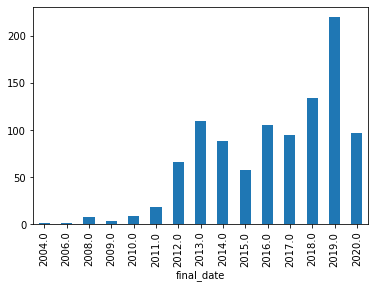

In [20]:

# printing 

inputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/UK_v2.csv"

df=pd.read_csv(inputFileName, parse_dates=["final_date"])
df["final_date"].groupby([df["final_date"].dt.year]).count().plot(kind="bar")



In [ ]:
# process statewise

agile_regex = re.compile(r'\bagile\b|\bagility\b', re.IGNORECASE | re.UNICODE)
agile_method_regex = re.compile(r'\bagile\b[^.]*?\bmethod\w*?\b', re.IGNORECASE | re.UNICODE)

agile_context_regex = re.compile(r'\s*([^\s]+?)\s+([^\s]+?)\s+([^\s]+?)\s+([^\s]+?)\s+agil.*?\s+([^\s]+)\s+([^\s]+?)\s+([^\s]+?)\s+([^\s]+?)\s+', re.IGNORECASE | re.UNICODE)



def process_state(state):
    csv_main = csv.DictReader(open("/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/ALL_CRAWLS/UK/CSV_State/agile_sites_output_Germany_{}.csv".format(state)), fieldnames=["id", 'url', 'domain', 'date1', 'date2', 'date3', 'heading'])
    array = {}
    for line in csv_main: 
        array[line["id"]] = line
    text_dir = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/TextFiles/Germany/{}".format(state)
    pathlib.Path(text_dir).mkdir(parents=True, exist_ok=True)

    for id, line in array.items():
        print("processing {}".format(id))
        id = line["id"]
        domain = line["domain"]
        path = '/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/ALL_CRAWLS/UK/State/{}/{}/{}.html'.format(state, domain, id)
        try:  
            soup = BeautifulSoup(open(path), "html.parser")
        except UnicodeDecodeError:
            soup = BeautifulSoup(open(path, encoding='windows-1252'), "html.parser")    
        doctext = soup.get_text().replace("\n", " ")
        with open("{}/{}.txt".format(text_dir, id), "w") as textfile:
            textfile.write(doctext)
        
        date4_element = soup.select_one("span.date")
        date4 = ""
        if date4_element is not None:
            date4 = date4_element.get_text()
        
        #Getting date5

        htmlparser = etree.HTMLParser()    
        try:
            tree = etree.parse(open(path), htmlparser)
        except UnicodeDecodeError:
            tree = etree.parse(open(path, encoding='windows-1252'), htmlparser)
        date5 = tree.xpath("substring(substring-after(/html//script[@type='application/ld+json']/text(), 'datePublished'), 4, 23)")

        # a special cases for date 5
        date5_1 = tree.xpath("substring(substring-after(/html//script[@type='application/ld+json']/text(), 'datePublished'), 4, 25)")


        # Getting date6

        date6_element = soup.select_one("h1#page-title + p")
        date6 = ""
        if date6_element is not None:
            date6 = date6_element.get_text()


        # Getting date7 from National Archives --> the date the site was archived on --> the date the site was released on would have been even earlier

        date7 = tree.xpath("substring(substring-after(/html/head/script/text(), 'timestamp'),9,14)")


        # assinging the already crawled dates
        date1 = line["date1"]
        date2 = line["date2"]


        # Storing the oldest date as final date variable in python date format
        date_vars = [date1, date2, date4, date5, date5_1, date6, date7]
        
        final_date = None 

        for date_var in date_vars:
            try:
                if final_date is None:
                    final_date = parse(date_var, ignoretz = True)
                elif parse(date_var, ignoretz=True) < final_date:
                    final_date = parse(date_var, ignoretz=True)
            except dateutil.parser._parser.ParserError:
                pass 


        #finding the matches for agile and agility
        agile_term = []
        agile_term = agile_regex.findall(doctext)

        #finding the matches for agile...methods
        agile_method = []
        agile_method = agile_method_regex.findall(doctext)

        # finding the context for the agile
        agile_context = []
        agile_context = agile_context_regex.search(doctext)

        agile_context_pre = ""
        agile_context_post = ""
        
        if agile_context is not None:
            agile_context_pre = " ".join(agile_context.group(1,2,3,4))
            agile_context_post = " ".join(agile_context.group(5,6,7,8))
        

        # assigning all the variables to the items

        if len(agile_term) == 0:
            line["agile_term"] = "" 
        else:
            line["agile_term"] = ",".join(agile_term)
        
        if len(agile_method) == 0:
            line["agile_method"] = "" 
        else:
            line["agile_method"] = ",".join(agile_method)

        line["agile_context_pre"] = agile_context_pre
        line["agile_context_post"] = agile_context_post 
        line["date4"] = date4
        line["date5"] = date5
        line["date5_1"] = date5_1
        line["date6"] = date6
        line["date7"] = date7
        line["final_date"] = final_date
        line["country"] = "Britain"
        line["level"] = "general"
        line["text_file_loc"] = "{}/{}.txt".format(text_dir, id)
    
    outputfile = open("/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/Germany/{}.csv".format(state), "w")
    writer = csv.DictWriter(outputfile, fieldnames=["id", "country", "level", 'url', 'domain', 'date1', 'date2', 'date3', 'date4', 'date5', 'date5_1', 'date6', 'date7', 'final_date', 'heading', 'agile_term', 'agile_method', 'agile_context_pre', 'agile_context_post', 'text_file_loc'])
    writer.writeheader()
    for id, line in array.items():
        writer.writerow(line)
    outputfile.close()


In [ ]:
##### Cleaning State
def cleaning_state(state):
    inputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/Germany/{}.csv".format(state)
    outputFileName = "/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/PYTHON/Analysis/DATA/Germany/{}_v1.csv".format(state)

    with open(inputFileName, newline='') as inFile, open(outputFileName, 'w', newline='') as outFile:
        df = pd.read_csv(inFile)
        df.sort_values(by=['final_date'])
        df.dropna(axis=0, how='any', thresh=None, subset=(['agile_term', 'agile_context_pre', 'agile_context_post']), inplace=True)
        df.drop_duplicates(subset=(['heading', 'agile_context_pre', 'agile_context_post']), inplace=True)
        df['heading'] = df['heading'].astype(str)
        #deleting false positives
        df = df[~df.agile_context_post.str.startswith("(")] # dropdown menu entry
        df = df[~df.agile_context_pre.str.endswith(")")] # dropdown menu entry
        df = df[~df.agile_context_pre.str.endswith("EB")] # supplier list
        df = df[~df.agile_context_post.str.match('and battle-winning armed forces')] #army related agility
        df = df[~df.agile_context_pre.str.match('Atom CategoriesCategories Select Category')] # dopdown menu entry
        df = df[~df.agile_context_pre.str.match('RAF to Force Generate')] # Entry on Air Commanders
        df = df[~df.agile_context_post.str.startswith("Trains")] # name of a company "Agility Trains"
        df = df[~df.agile_context_post.str.startswith("trains")] # name of a company "Agility Trains"
        df.to_csv(outFile)

In [ ]:
################### END OF ANALYSIS ###################

In [28]:
#tester for getting dates with Xpath

htmlparser = etree.HTMLParser()    
try:
    tree = etree.parse(open("/Users/mxm/Google Drive/Masterstudium/Inhalte/Master Thesis/GithubRepository/Analysis/ALL_CRAWLS/Germany/Federal/www.westmidlands-pcc.gov.uk/765598f5-dc1c-3af2-94a6-96bd59ad0c44.html", "r"), htmlparser)
except UnicodeDecodeError:
    tree = etree.parse(open(path, encoding='windows-1252'), htmlparser)
date8 = tree.xpath("substring(substring-after(/html//script[@type='application/ld+json']/text(), 'datePublished'), 4, 25)")
print(date8)


2019-05-29T12:44:02+00:00


In [40]:
#testing regex expressions
agile_regex = re.compile(r'\bagile\b|\bagility\b', re.IGNORECASE | re.UNICODE)
text = 'agile wargames which will be developed further in future years. The Head of the Defence Wargaming Centre, Mike Larner, commented: “The DWC brings together the people, expertise, infrastructure and technology needed to develop and deliver a wide variety of wargames. It represents a significant step up in capability and signals our intent to keep developing in response to growing MOD and wider government demand for wargaming – which is, in turn, a response to the increasing complexity of conflict. Wargaming enables commanders to anticipate and rehearse future conflicts which, ultimately, increases the UK’s capability to deter aggression and protect its interests.” Group Captain Christopher Platt, Dstl’s Senior Air Advisor, commented: ““Eagle Warrior 19 was a genuinely ambitious experiment that challenged participants to think about Command and Control of the Next Generation Royal Air Force.  Staying one step ahead of an information savvy adversary is a constant challenge, we will need to embrace a combination of information technologies such as cloud computing, edge processing, machine learning and automation, so this wargame was a good step towards understanding the pros and cons of different approaches.”      Share this page         Share on Facebook         Share on Twitter          Published 15 January 2020             Explore the topic  Military equipment, logistics and technology Military recruitment, training and operations           Is this page useful?          Maybe               Yes this page is useful               No this page is not useful               Is there anything wrong with this page?          Thank you for your feedback      Close     Help us improve GOV.UK Don’t include personal or financial information like your National Insurance number or credit card details.     What were you doing?        What went wrong?    Send     Close      Help us improve GOV.UK To help us improve GOV.UK, we’d like to know more about your visit today. We’ll send you a link to a feedback form. It will take only 2 minutes to fill in. Don’t worry we won’t send you spam or share your email address with anyone.     Email address    Send me the survey           Transition period                   Find out what it means for you                    Services and information                        Benefits                                       Births, deaths, marriages and care                                       Business and self-employed                                       Childcare and parenting                                       Citizenship and living in the UK                                       Crime, justice and the law                                       Disabled people                                       Driving and transport                                           Education and learning                                       Employing people                                       Environment and countryside                                       Housing and local services                                       Money and tax                                       Passports, travel and living abroad                                       Visas and immigration                                       Working, jobs and pensions                        Departments and policy                  How government works                               Departments                               Worldwide                               Services                               Guidance and regulation                               News and communications                               Research and statistics                               Policy papers and consultations                               Transparency and freedom of information releases                     Support links  Help Privacy Cookies Contact Accessibility statement Terms and conditions Rhestr o Wasanaethau Cymraeg      Built by the            Government Digital Service                               Open Government Licence                     All content is available under the Open Government Licence v3.0, except where otherwise stated                      © Crown copyright                         if (typeof window.GOVUK === 'undefined') document.body.className = document.body.className.replace('js-enabled', '');    {"@context":"http://schema.org","@type":"NewsArticle","mainEntityOfPage":{"@type":"WebPage","@id":"https://www.gov.uk/government/news/dstl-unveils-uks-first-defence-wargaming-centre"},"headline":"Dstl Unveils UK's First Defence Wargaming Centre","datePublished":"2020-01-15T15:46:50.000+00:00","dateModified":"2020-01-15T15:46:50.000+00:00","description":"Dstl has opened the UK's first dedicated wargaming centre for use by all 3 services and conducted the inaugural exercise, Eagle Warrior 19.","publisher":{"@type":"Organization","name":"GOV.UK","url":"https://www.gov.uk","logo":{"@type":"ImageObject","url":"https://assets.publishing.service.gov.uk/government-frontend/govuk_publishing_components/govuk-logo-e5962881254c9adb48f94d2f627d3bb67f258a6cbccc969e80abb7bbe4622976.png"}},"image":["https://assets.publishing.service.gov.uk/government/uploads/system/uploads/image_data/file/94880/s960_45155792_Hi_Res_Copy.jpg"],"author":{"@type":"Organization","name":"Defence Science and Technology Laboratory","url":"https://www.gov.uk/government/organisations/defence-science-and-technology-laboratory"},"about":[{"@context":"http://schema.org","@type":"Thing","sameAs":"https://www.gov.uk/defence/working-armed-forces"},{"@context":"http://schema.org","@type":"Thing","sameAs":"https://www.gov.uk/defence/international-defence-commitments"},{"@context":"http://schema.org","@type":"Thing","sameAs":"https://www.gov.uk/defence/military-equipment-logistics-technology"},{"@context":"http://schema.org","@type":"Thing","sameAs":"https://www.gov.uk/defence/military-recruitment-training-operations"}],"articleBody":"\u003cdiv class=\"govspeak\"\u003e\u003cp\u003eThe UK’s first dedicated, purpose designed wargaming centre has been unveiled by the Defence Science and Technology Laboratory (Dstl). The Defence Wargaming Centre (DWC) on Dstl’s Portsdown West site near Portsmouth is hosting wargames for all three services, with the RAF having conducted the first exercise, Eagle Warrior 19, last month (December 2019).\u003c/p\u003e\n\n\u003cp\u003eDstl has a long history of delivering successful wargames on behalf of MOD and other government departments, conducted both at Dstl and at other sites in the UK and overseas. Wargame participants experience the rigour and implications of decision making in a “safe to fail” environment, without the risk, expense and disruption of live exercises or real operations.\u003c/p\u003e\n\n\u003cp\u003eThe DWC has been established to respond to the increasing demand for wargaming as a tool both to support decisions and to develop insight into complex issues faced by Defence and Security now and in the future. The DWC will become MOD’s only dedicated, purpose designed wargaming facility, and will bring together expertise and technology from across Dstl, wider Defence, industry and other partners.\u003c/p\u003e\n\n\u003cp\u003eThe DWC can be configured to deliver a wide variety of wargames of different types and sizes for a range of purposes. The DWC is also intended to be a focus for research into wargaming methods'
print(agile_regex.findall(text))

[]
